In [15]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('sched_optim_test_results.csv')

df['train_accuracies'] = df['train_accuracies'].apply(ast.literal_eval)
df['val_accuracies'] = df['val_losses'].apply(ast.literal_eval)
df['train_losses'] = df['train_losses'].apply(ast.literal_eval)
df['val_losses'] = df['val_losses'].apply(ast.literal_eval)

In [17]:
df

,Unnamed: 0,learning_rate,batch_size,weight_decay,optimizer,scheduler,train_accuracies,train_losses,val_accuracies,val_losses,test_accuracy
0,0,0.0001,64,0.01,Adam,ReduceLROnPlateau,"[2.3529411764705883, 5.686274509803922, 11.666...","[4.533327136320226, 4.030402521058625, 3.74267...","[4.637296420452642, 4.159742209490608, 3.67220...","[4.637296420452642, 4.159742209490608, 3.67220...",50.951374
1,1,0.0001,64,0.01,Adam,CosineAnnealingLR,"[2.7450980392156863, 8.431372549019608, 13.529...","[4.537338225046794, 4.039232897290996, 3.66179...","[4.606267601835961, 4.104200948453417, 3.60385...","[4.606267601835961, 4.104200948453417, 3.60385...",50.073183
2,2,0.0001,64,0.01,Adam,StepLR,"[2.843137254901961, 8.431372549019608, 11.0784...","[4.49502104029936, 4.005785575567507, 3.691144...","[4.608006256701899, 4.134257610171449, 3.60879...","[4.608006256701899, 4.134257610171449, 3.60879...",30.265084
3,3,0.0001,64,0.01,Adam,OneCycleLR,"[1.2745098039215685, 2.6470588235294117, 3.627...","[4.621814030291987, 4.584350355933695, 4.55486...","[4.625470950556736, 4.60649886598774, 4.551445...","[4.625470950556736, 4.60649886598774, 4.551445...",36.119694
4,4,0.0001,64,0.01,AdamW,ReduceLROnPlateau,"[2.3529411764705883, 7.549019607843137, 12.156...","[4.5660967546350815, 4.038562798967549, 3.7025...","[4.6311896698147645, 4.167223124410592, 3.6744...","[4.6311896698147645, 4.167223124410592, 3.6744...",44.885347
5,5,0.0001,64,0.01,AdamW,CosineAnnealingLR,"[2.9411764705882355, 7.745098039215686, 12.549...","[4.536781198838177, 4.018539772781671, 3.69619...","[4.6311039718927125, 4.225268522898356, 3.6872...","[4.6311039718927125, 4.225268522898356, 3.6872...",45.861116
6,6,0.0001,64,0.01,AdamW,StepLR,"[2.6470588235294117, 8.333333333333334, 12.352...","[4.538282835717295, 4.031242067673627, 3.69298...","[4.635806223925422, 4.274355379740397, 3.78873...","[4.635806223925422, 4.274355379740397, 3.78873...",28.557489
7,7,0.0001,64,0.01,AdamW,OneCycleLR,"[0.9803921568627451, 1.9607843137254901, 2.843...","[4.634297211964925, 4.601667626698812, 4.57442...","[4.627542465808345, 4.6145799262850895, 4.5672...","[4.627542465808345, 4.6145799262850895, 4.5672...",35.908278
8,8,0.0001,64,0.01,SGD,ReduceLROnPlateau,"[1.1764705882352942, 0.49019607843137253, 1.47...","[4.628073277192957, 4.619907541836009, 4.61202...","[4.626808463825899, 4.621313699086508, 4.60036...","[4.626808463825899, 4.621313699086508, 4.60036...",28.427387
9,9,0.0001,64,0.01,SGD,CosineAnnealingLR,"[1.3725490196078431, 1.3725490196078431, 1.862...","[4.638613652248009, 4.629068541059307, 4.61165...","[4.627050046359791, 4.624050177779853, 4.61254...","[4.627050046359791, 4.624050177779853, 4.61254...",20.588714


In [18]:
def plot_losses(df):
    for i, row in df.iterrows():
        plt.plot(row['train_losses'], label=f'train {row["scheduler"]}')
        plt.plot(row['val_losses'], label=f'val {row["scheduler"]}')
    plt.title(f'Losses for {row["optimizer"]}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def plot_accuracies(df):
    for i, row in df.iterrows():
        plt.plot(row['train_accuracies'], label=f'train {row["scheduler"]}')
        plt.plot(row['val_accuracies'], label=f'val {row["scheduler"]}')
    plt.title(f'Accuracies for {row["optimizer"]}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [19]:
adam = df[df['optimizer'] == 'Adam']
adamw = df[df['optimizer'] == 'AdamW']
sgd = df[df['optimizer'] == 'SGD']
rmsprop = df[df['optimizer'] == 'RMSprop']


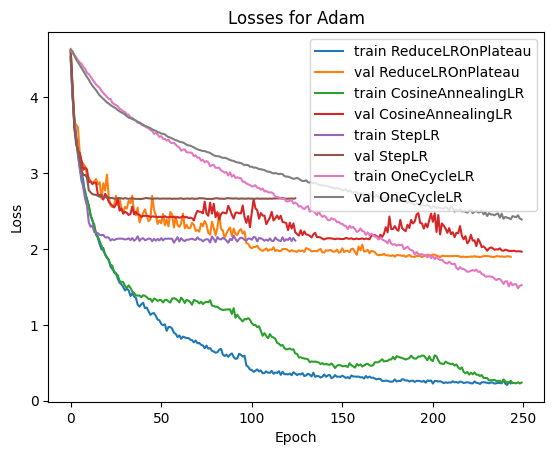

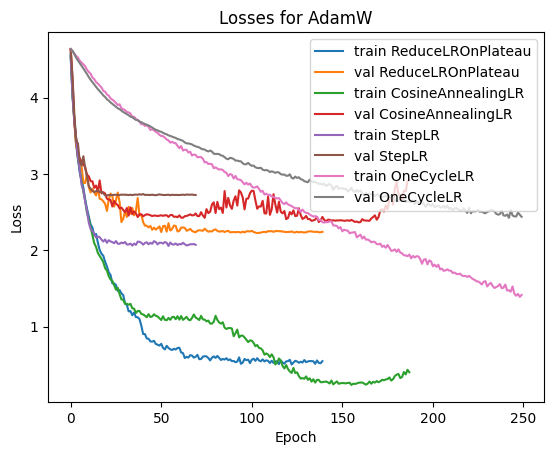

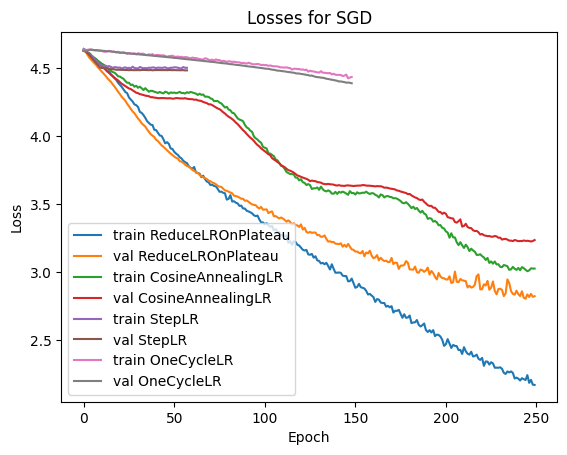

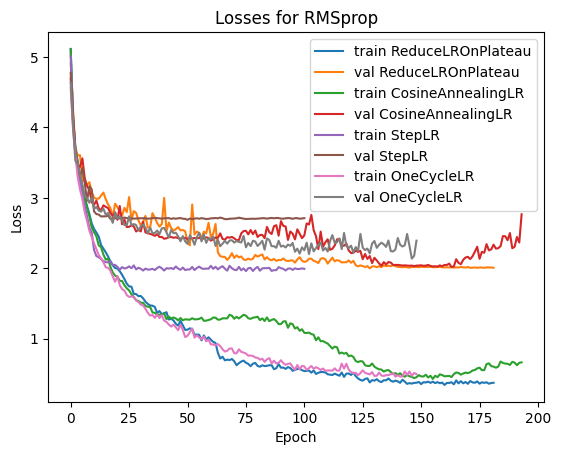

In [20]:
plot_losses(adam)
plot_losses(adamw)
plot_losses(sgd)
plot_losses(rmsprop)

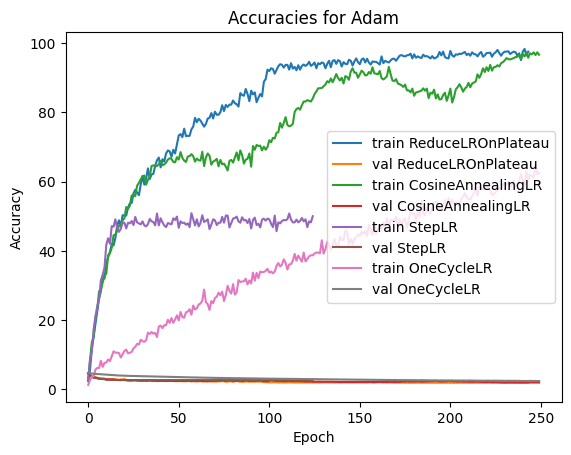

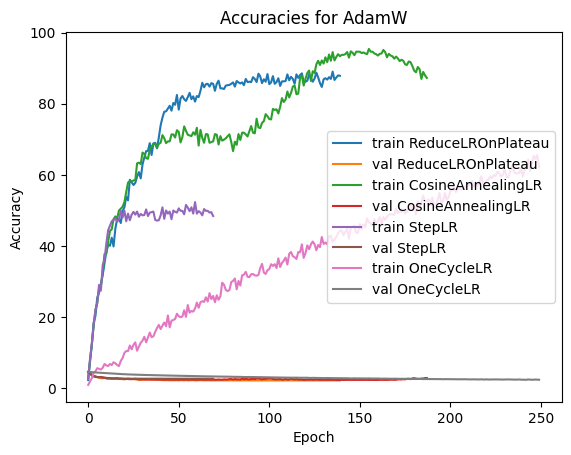

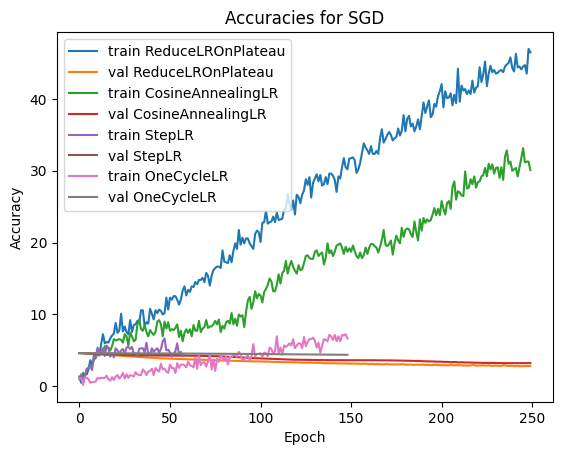

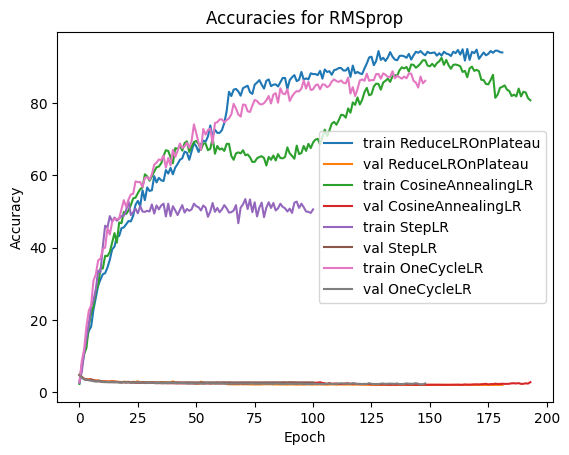

In [21]:
plot_accuracies(adam)
plot_accuracies(adamw)
plot_accuracies(sgd)
plot_accuracies(rmsprop)

In [22]:
# Get the number of epochs for each optimizer
for i, row in df.iterrows():
    print(f'{row["optimizer"]} took {len(row["train_accuracies"])} epochs to train')

Adam took 244 epochs to train
Adam took 250 epochs to train
Adam took 125 epochs to train
Adam took 250 epochs to train
AdamW took 140 epochs to train
AdamW took 188 epochs to train
AdamW took 70 epochs to train
AdamW took 250 epochs to train
SGD took 250 epochs to train
SGD took 250 epochs to train
SGD took 58 epochs to train
SGD took 149 epochs to train
RMSprop took 182 epochs to train
RMSprop took 194 epochs to train
RMSprop took 101 epochs to train
RMSprop took 149 epochs to train
